## Observations and Insights 

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
print(combined_data.shape)
combined_data

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [135]:
# Checking the number of mice in the DataFrame.
combined_data["Mouse ID"].value_counts()

g989    13
u364    10
a963    10
l509    10
e476    10
        ..
o848     1
b447     1
h428     1
u153     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [136]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
print(duplicates[['Mouse ID', 'Timepoint']])

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouseid = combined_data[combined_data.duplicated(subset=['Mouse ID'], keep='last')]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
removed_dup = combined_data.drop_duplicates(subset='Mouse ID', 
                     keep='last', inplace = False)
print(f'Duplicate shape: {removed_dup.shape}')
removed_dup

Duplicate shape: (249, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [143]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(removed_dup['Mouse ID']))

249

## Summary Statistics

In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

df = pd.DataFrame([{'mean': removed_dup['Tumor Volume (mm3)'].mean(),
                   'median': removed_dup['Tumor Volume (mm3)'].median(),
                   'variance': removed_dup['Tumor Volume (mm3)'].var(),
                   'std': removed_dup['Tumor Volume (mm3)'].std(),
                    'sem': removed_dup['Tumor Volume (mm3)'].sem()
                  }])
df

,mean,median,variance,std,sem
0,54.999137,55.84141,160.151054,12.65508,0.801983


In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [146]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

In [147]:
regimen_group = removed_dup.groupby('Drug Regimen')
count_regimen = regimen_group['Drug Regimen'].count()
count_regimen

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Drug Regimen, dtype: int64

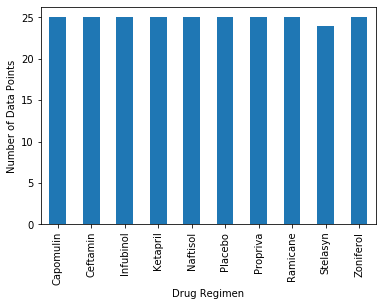

<Figure size 432x288 with 0 Axes>

In [148]:
regimen_chart = count_regimen.plot(kind='bar')

regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()

In [149]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [150]:
x_axis = np.arange(len(np.unique(removed_dup["Drug Regimen"])))
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x1a2330b490>,
 <a list of 10 Text xticklabel objects>)

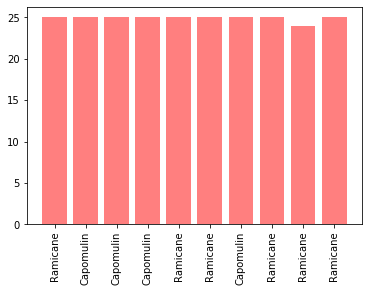

In [151]:
plt.bar(x_axis, count_regimen, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, removed_dup["Drug Regimen"], rotation="vertical")

## Pie Plots

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [153]:
gender_group = removed_dup.groupby('Sex')
count_gender = gender_group['Sex'].count()
count_gender

Sex
Female    124
Male      125
Name: Sex, dtype: int64

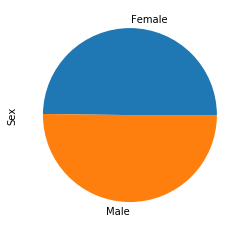

In [154]:
gender_chart = count_gender.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1a253e3590>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

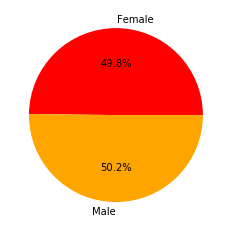

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [removed_dup[removed_dup["Sex"] == "Female"].count()["Sex"], removed_dup[removed_dup["Sex"] == "Male"].count()["Sex"]]

# The colors of each section of the pie chart
colors = ["red", "orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

In [156]:
removed_dup[removed_dup["Sex"] == "Female"].count()["Sex"]

124

In [157]:
removed_dup[removed_dup["Sex"] == "Male"].count()["Sex"]

125

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [167]:
regimen_group = removed_dup.groupby(['Drug Regimen', 'Mouse ID']).agg({'Tumor Volume (mm3)': ['last']})

# As mentioned on slack, analysis done using 'last' 'Tumor Volume (mm3)'.
regimen_group.columns = ['tumor_final']
regimen_group = regimen_group.reset_index()

regimen_group.head()

,Drug Regimen,Mouse ID,tumor_final
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220


In [169]:
# 1. Capomulin
regimen_group[regimen_group['Drug Regimen'] == 'Capomulin']

,Drug Regimen,Mouse ID,tumor_final
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
5,Capomulin,i557,47.685963
6,Capomulin,i738,37.311846
7,Capomulin,j119,38.125164
8,Capomulin,j246,38.753265
9,Capomulin,l509,41.483008


In [170]:
#2. Ceftamin
regimen_group[regimen_group['Drug Regimen'] == 'Ceftamin']

,Drug Regimen,Mouse ID,tumor_final
25,Ceftamin,a275,62.999356
26,Ceftamin,b447,45.000000
27,Ceftamin,b487,56.057749
28,Ceftamin,b759,55.742829
29,Ceftamin,f436,48.722078
30,Ceftamin,h531,47.784682
31,Ceftamin,j296,61.849023
32,Ceftamin,k210,68.923185
33,Ceftamin,l471,67.748662
34,Ceftamin,l490,57.918381


In [171]:
#3. Infubinol
regimen_group[regimen_group['Drug Regimen'] == 'Infubinol']

,Drug Regimen,Mouse ID,tumor_final
50,Infubinol,a203,67.973419
51,Infubinol,a251,65.525743
52,Infubinol,a577,57.031862
53,Infubinol,a685,66.083066
54,Infubinol,c139,72.226731
55,Infubinol,c326,36.321346
56,Infubinol,c895,60.969711
57,Infubinol,e476,62.435404
58,Infubinol,f345,60.918767
59,Infubinol,i386,67.289621


In [172]:
#4. Ketapril
regimen_group[regimen_group['Drug Regimen'] == 'Ketapril']

,Drug Regimen,Mouse ID,tumor_final
75,Ketapril,a457,49.783419
76,Ketapril,c580,58.046569
77,Ketapril,c819,62.175705
78,Ketapril,c832,65.415955
79,Ketapril,d474,60.233733
80,Ketapril,f278,48.194578
81,Ketapril,f932,45.000000
82,Ketapril,g107,71.905117
83,Ketapril,g497,69.872251
84,Ketapril,h246,74.104086


In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
all_four = regimen_group[(regimen_group['Drug Regimen'] == 'Ketapril') 
              | (regimen_group['Drug Regimen'] == 'Infubinol')
              | (regimen_group['Drug Regimen'] == 'Ceftamin')
              | (regimen_group['Drug Regimen'] == 'Capomulin')]

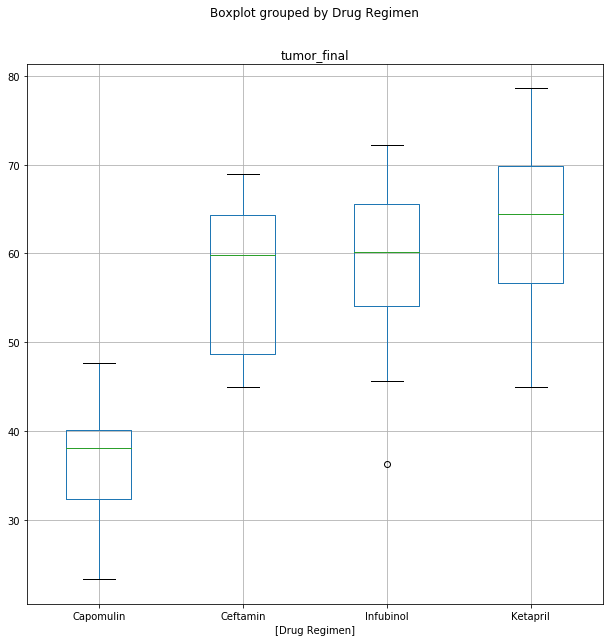

In [184]:
all_four.boxplot(by='Drug Regimen', figsize=(10, 10))

## Line and Scatter Plots

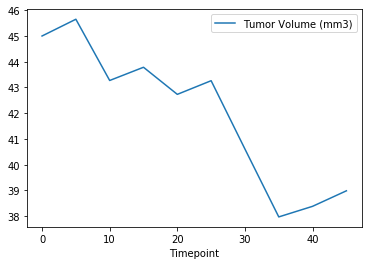

In [196]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == 'b128')]
data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

In [208]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
regimen_group = removed_dup.groupby(['Drug Regimen', 'Weight (g)']).agg({'Tumor Volume (mm3)': ['mean']})
regimen_group.columns = ['tumor_average']
regimen_group = regimen_group.reset_index()

capomulin = regimen_group[regimen_group['Drug Regimen'] == 'Capomulin']
capomulin.head()

,Drug Regimen,Weight (g),tumor_average
0,Capomulin,15,28.484033
1,Capomulin,17,30.287623
2,Capomulin,19,36.416666
3,Capomulin,20,37.311846
4,Capomulin,21,39.175015


Text(0.5, 1.0, 'Weight vs Average Tumor volume')

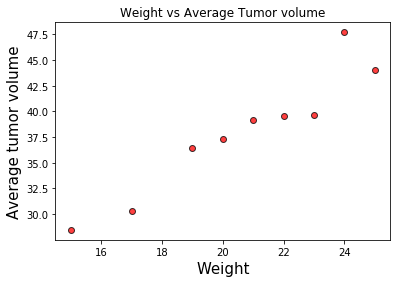

In [210]:
x = capomulin['Weight (g)']
y = capomulin['tumor_average']

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Average tumor volume', fontsize=15)
plt.title('Weight vs Average Tumor volume')

## Correlation and Regression

In [224]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"Correlation coefficient: {capomulin[['Weight (g)', 'tumor_average']].corr().values[0][1]}")

Correlation coefficient: 0.9503881112220831


In [229]:
removed_dup.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

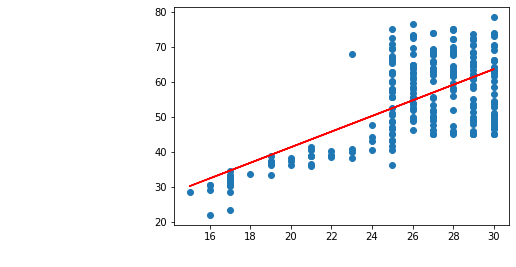

In [231]:
#I know I need to use this model to do linear regression, but I just could not figure out how to do the changes to this set up so that it would apply to his question
#This is the best I could think of, but it is probably wrong.
from scipy.stats import linregress

x_values = removed_dup['Weight (g)']
y_values = removed_dup['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('')
plt.ylabel('')
plt.show()